# Block image approximation

In [2]:
import numpy as np
import cv2
from helper import *

In [5]:
img = cv2.imread("./img/pic.png")

test_block = np.zeros((4, 4, 3), dtype=np.uint8)
test_block[:2, :2, 0] = 255
test_block[2:, :2, 1] = 255
test_block[2:, 2:, 2] = 255
test_block[1:3, 1:3, :] = 255

Image size:(461, 471, 3)


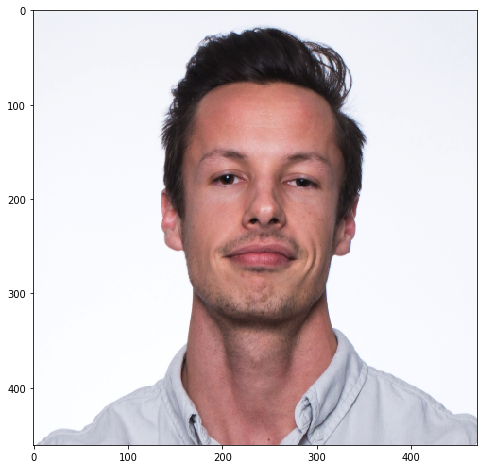

In [6]:
show_img(img)

In [7]:
# loop over canny edges and place blocks
canny_set = [
    [20, 50],
    [100, 200],
    [150, 250],
    [200, 400],
    [100, 300],
    [250, 500],
    [300, 600],
    [400, 800]
]

(8, 461, 471, 3)
Image size:(932, 1914, 3)


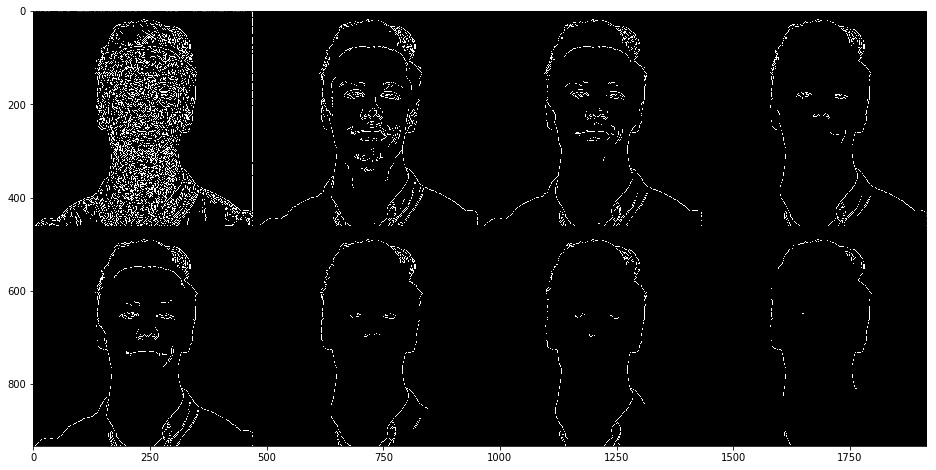

In [8]:
c_imgs = []
for s in canny_set:
    c_imgs.append(cv2.Canny(img, s[0], s[1]))

c_imgs = np.array(c_imgs)
c_imgs = np.expand_dims(c_imgs, axis=3)
c_imgs = np.concatenate((c_imgs, c_imgs, c_imgs), axis=3)

print(c_imgs.shape)

show_img(flex_combine(c_imgs))

Image size:(461, 1914, 3)


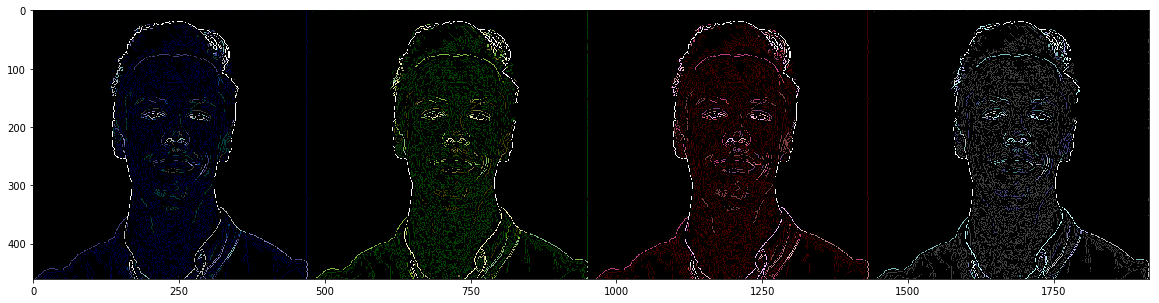

In [9]:
def add_colors(imgs, start=0):
    canvas = np.zeros_like(imgs[0])
    colors = np.array([
        [255, 0, 0],
        [0, 255, 0],
        [0, 0, 255],
        [255, 255, 255]
    ], dtype=np.uint8)
    c = start
    for i in c_imgs:
        canvas += (colors[c%4]//255) * i // 4
        c += 1
    return canvas
    
results = []
for i in range(4):
    results.append(add_colors(c_imgs, start=i))

show_img(flex_combine(results))

Image size:(461, 1914, 3)


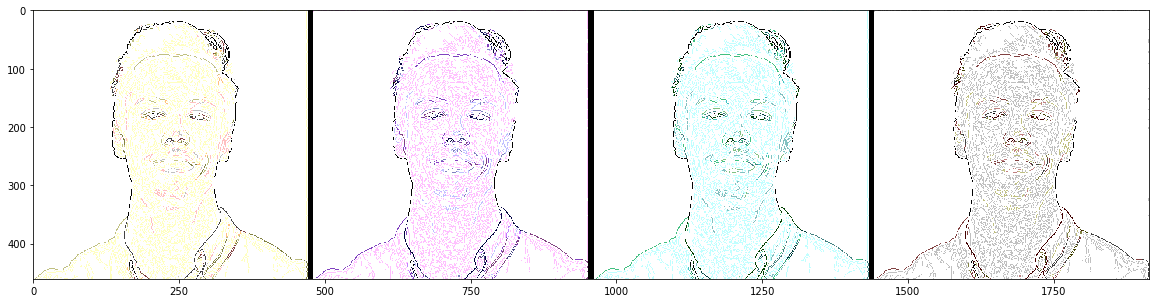

In [10]:
def inverse(img):
    return (255-img)

show_img(flex_combine(inverse(np.array(results))))

In [11]:
def rotate_img(img, rotation):
    if rotation == 0:
        return img

    rotation = rotation % 4
    rot_dict = {
        1: cv2.ROTATE_90_COUNTERCLOCKWISE,
        2: cv2.ROTATE_180,
        3: cv2.ROTATE_90_CLOCKWISE,
    }
    return cv2.rotate(img, rot_dict[rotation])

In [12]:
def directional_striping(img, direction=0):
    img = rotate_img(img, -direction)
    result = np.zeros_like(img)
    # starts east, counter-clockwise
    black = np.array([0, 0, 0])
    
    for ri in range(img.shape[0]):
        v = np.array([0, 0, 0])
        for ci in range(img.shape[1]):
            cv = img[ri, ci]
            if np.all(cv == black):
                v = (v * 0.9).astype(np.uint8)
            else:
                if np.sum(cv) > np.sum(v):
                    v = cv
                else:
                    v = 0.9 * v + 0.1 * cv
            
            result[ri, ci] = v
    
    result = rotate_img(result, direction)
    return result

In [13]:
blurs = []

for i in range(4):
    blurs.append(directional_striping(results[i], direction=i))

blurs = np.array(blurs)

Image size:(461, 1914, 3)


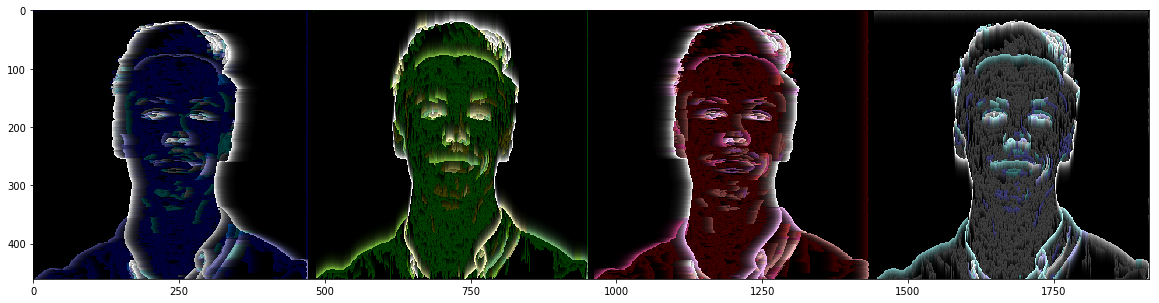

In [14]:
show_img(flex_combine(blurs))

Image size:(461, 471, 3)


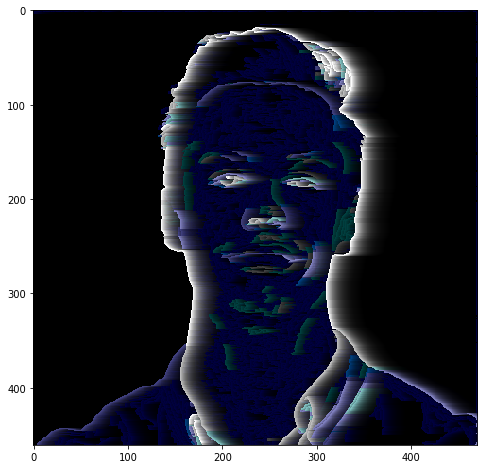

In [15]:
show_img(blurs[0])

In [16]:
dst = cv2.addWeighted(blurs[0],0.5,blurs[1],0.5, 0)
dst2 = cv2.addWeighted(blurs[2],0.5,blurs[3],0.5, 0)
dst3 = cv2.addWeighted(dst,0.5,dst2,0.5, 0)

Image size:(461, 471, 3)


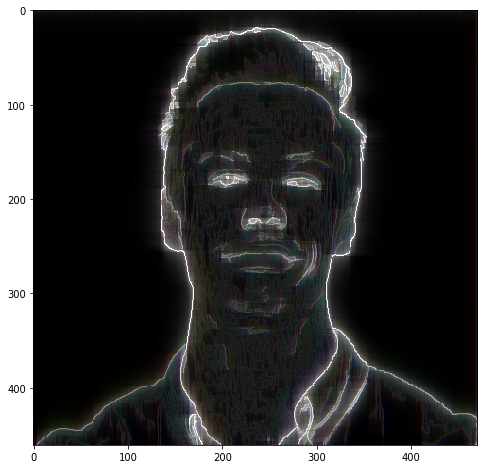

In [17]:
show_img(dst3)

In [18]:
def pixelwise_max(imgs, per_channel=False):
    canvas = np.zeros_like(imgs[0])
    for ri in range(img.shape[0]):
        for ci in range(img.shape[1]):
            if per_channel:
                vals = np.max(blurs[:, ri, ci, :], axis=1)
            else:
                vals = np.sum(blurs[:, ri, ci, :], axis=1)
            canvas[ri, ci] = imgs[np.argmax(vals), ri, ci]
    return canvas

Image size:(461, 471, 3)


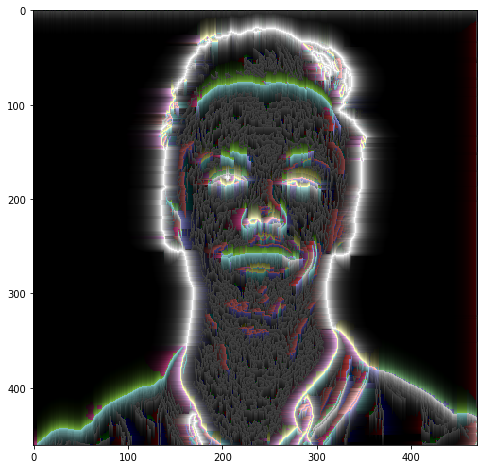

In [19]:
maxed = pixelwise_max(blurs)
show_img(maxed)

Image size:(461, 471, 3)


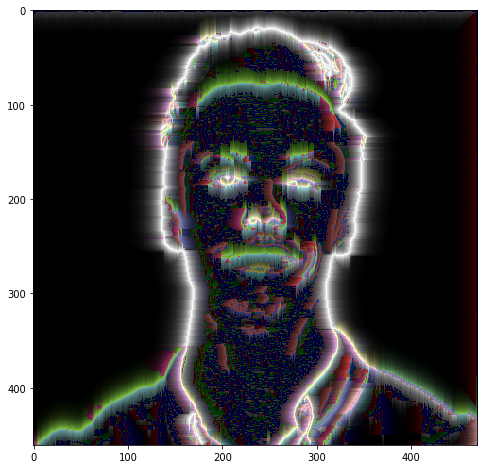

In [20]:
maxed_c = pixelwise_max(blurs, per_channel=True)
show_img(maxed_c)

In [21]:
a = np.array([200, 250], dtype=np.uint8)
b = np.array([50, 55], dtype=np.uint8)

Image size:(461, 471, 3)


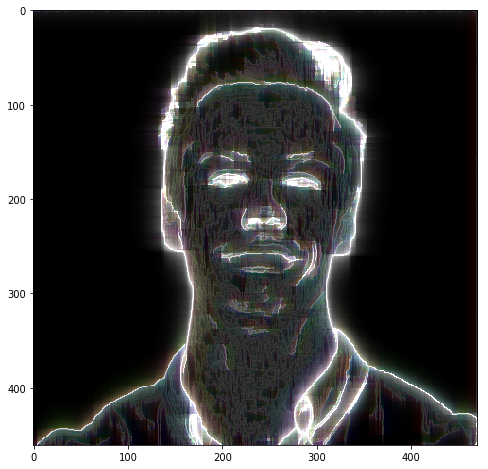

In [22]:
show_img(np.clip(dst3*1.7, 0, 255).astype(np.uint8))

Image size:(461, 471, 3)


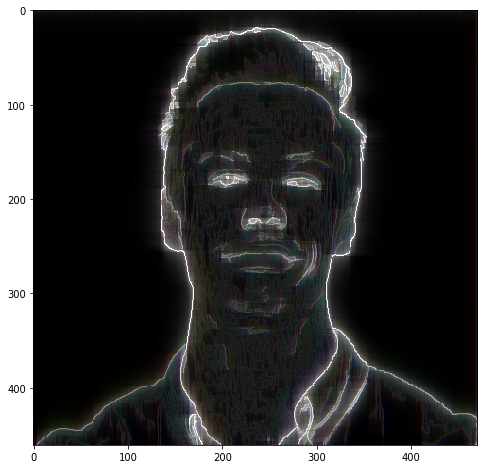

In [23]:
show_img(dst3)

Image size:(461, 471)


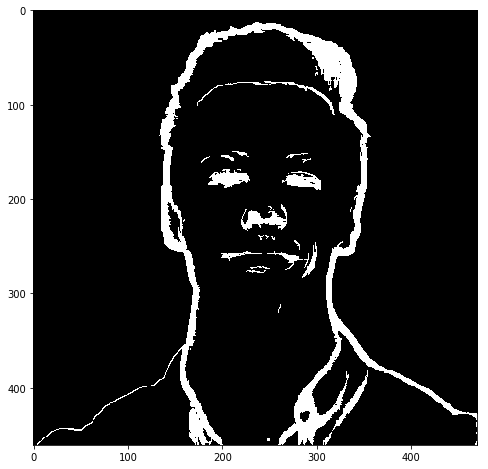

In [36]:
scribit = np.zeros(dst.shape[:2])
scribit[np.average(dst, axis=2) > 70] = 255
show_img(scribit)